# Data Exploration
<hr>

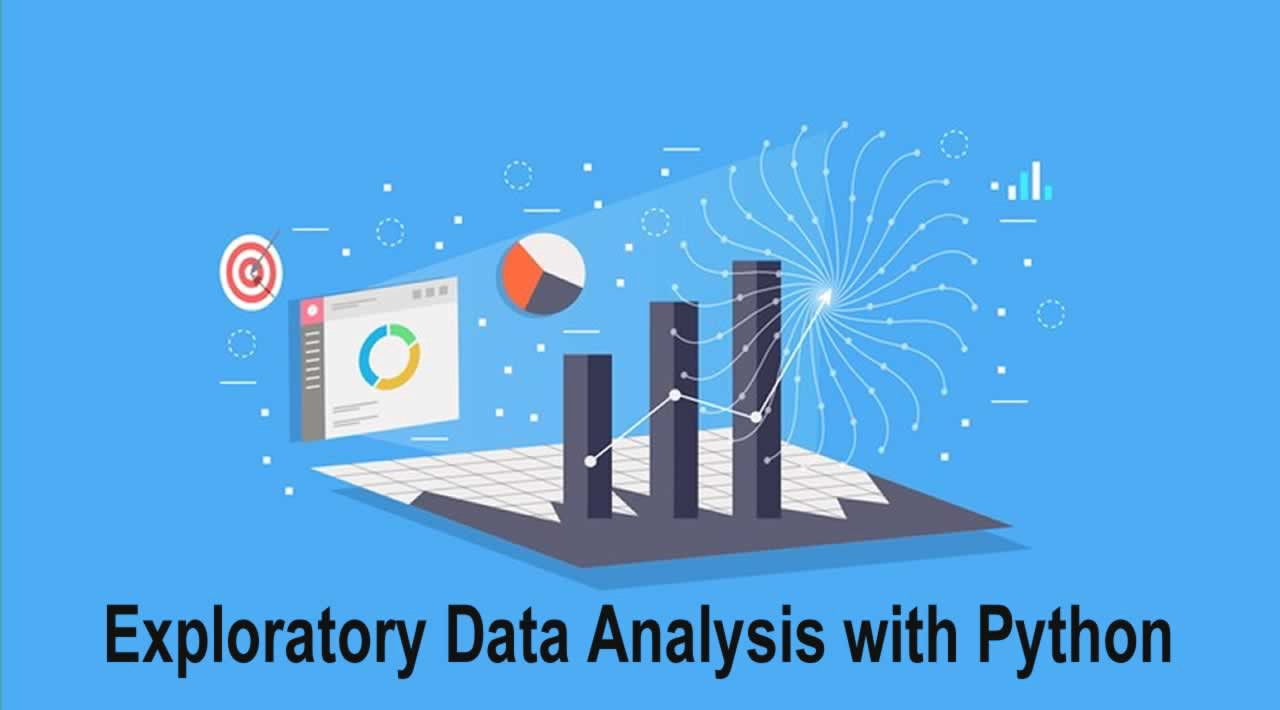
* **Exploratory Data Analysis(EDA)** 
  
  : understanding what is in a dataset and the characteristics of the data, rather than through traditional data management systems

<hr>


How to use this notebook :

There is only minimum explanation

This notebook could be helpful for who want to see how code works right away

Please upvote if it was helpful.! 


<hr>

## Content
1. [Import libraries](#one)
2. [Check our data](#two)
3. [Preprocessing](#three)

<a id="one"></a>

# 1. Import libraries

<hr>

In [ ]:
# we are biginners, just move on

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<a id="two"></a>

# 2.Check our data

<hr>

In [ ]:
# biring the data

df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')


In [ ]:
# check the columns

df_train.columns

In [ ]:
# check 5 data

df_train.head()

<hr>

## 2.1 Type

We have to know data type about our data

There are two possible data type 

* **Categorical** : values are categories

  1. Norminal Data : even if value is changed, we dont know it is good or not
  2. Ordinal Data : if value is changed, we can know it is good or not



* **Numerical** : values are numbers

  1. Discrete Data  : decimal representation is possible
  2. Continuous Data : decimal representation is impossible

In [ ]:
# lets see our purpose 'SalePrice'
df_train['SalePrice'].describe()

In [ ]:
#histogram

sns.distplot(df_train['SalePrice']);

we can find out that data deviate from the normal distribution

lets see skewness, kurtosis

* **skewness** : balance between left and right of distribution

* **kurtosis** : balance between up and down of distribution

In [ ]:
print("Skewness : %f" % df_train['SalePrice'].skew())
print("Kurtosis : %f" % df_train['SalePrice'].kurt())

## 2.2 Relationship with numerical features

<hr>

In [ ]:
# scatter plot grlivarea/saleprice
 
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.plot.scatter('GrLivArea','SalePrice',ylim=(0,800000));

we can find out that 'SalePrice' and 'GrLivArea' are linear relationship

In [ ]:
# scatter plot totalbsmtsf/saleprice
 
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
data.plot.scatter('TotalBsmtSF','SalePrice',ylim=(0,800000));

we can find out that 'SalePrice' and 'TotalBsmtSF' are linear relationship as well

<hr>

## 2.3 Relationship with categorical features


In [ ]:
# box plot overallqual/saleprice

data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

we can find out that overallqual is high then saleprice is high too

In [ ]:
# box plot yearbuilt/saleprice

data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

not a strong tendency, but usually new builted houses seem to be more expensive

<hr>

## 2.4 In summary

* **Feature Selection** : choice of the right features

* **Feature Engineering** : make simple definition of features


* 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.

* 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

We just analysed four features with subjective approaching

* choose features with owner mind

As an engineer, we have to deal with objective approaching

* Correlation matrix (heatmap style).
* SalePrice correlation matrix (zoomed heatmap style).
* Scatter plots between the most correlated variables (move like Jagger style).




<hr>

## 2.5 Correlation matrix (heatmap style)

In [ ]:
# correlation matrix

corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=.8,square=True);

In my opinion, this heatmap is the best way to get a quick overview

This is very useful for features selection

<hr>

## 2.6 'SalePrice' correlation matrix (zoomed heatmap style)

In [ ]:
#saleprice correlation matrix

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

we can find out that 'OverallQual', 'GrLivArea' are strongly correlated with 'SalePrice' 

<hr>

## 2.7 Scatter plots between 'SalePrice' and correlated variables 

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In this figure we can see the dots drawing a linear line, which almost acts like a border

<a id="three"></a>

# 3.Preprocessing

* **Preprocessing :** used in machine learning and data mining to make input data easier to work with

<hr>

## 3.1 Missing data

Important questions when thinking about missing data:

* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

In [ ]:
# missing data

total =df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)


There are few ways for missing data

* More than 15%, we delete
* Fill missing data with mean value
* Fill missing data with min value
* Fill missing data with max value

In [ ]:
# delete missing data

df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

<hr>

## 3.2 Outliar

Outliers can markedly affect our models

We will find out outliers with 2-ways

* **Univariate analysis** : analysis only one variable
* **Bivariate analysis** : analysis of two variables

<hr>

### Univariate analysis

In [ ]:
# standardizing- converting data values to have mean of 0 and a standard deviation of 1.

saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

we can find out from here

* Low range values are similar and not too far from 0
* High range values are far from 0 and the 7 (something values are really out of range)

<hr>

### Bivariate analysis

In [ ]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

we can find out from here

* The two values with bigger 'GrLivArea' seem strange 
* High range values are far from 0 and the 7.something values are really out of range

<hr>

## 3.3 Normalty


Normality what we mean is that the data should look like a normal distribution

This is important because several statistic tests rely on this

* **Histogram** - Kurtosis and skewness
* **Normal probability plot** - Data distribution should closely follow the diagonal that represents the normal distribution.

In [ ]:
#histogram and normal probability plot

sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

we can find out from here

* 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line
*  Positive skewness, log transformations usually works well

In [ ]:
# applying log transformation

df_train['SalePrice'] = np.log(df_train['SalePrice'])

In [ ]:
# transformed histogram and normal probablility plot

sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'],plot=plt)


Done! Let's check what's going on with 'GrLivArea'



In [ ]:
#histogram and normal probability plot

sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

we can find out from here

* 'GrLivArea' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line
*  Positive skewness, log transformations usually works well

In [ ]:
#data transformation

df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

In [ ]:
#transformed histogram and normal probability plot

sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Next

In [ ]:
#histogram and normal probability plot

sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

we can find out from here

* We can not use log transformation to here
* A significant number of observations with value zero 
*  Positive skewness, log transformations usually works well

To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

I'm not sure if this approach is correct. It just seemed right to me. That's what I call 'high risk engineering

In [ ]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0

df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [ ]:
#transform data

df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

In [ ]:
#histogram and normal probability plot

sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

<hr>

## 3.4 Homoscedasticity

The best approach to test homoscedasticity for two metric variables is graphically

Starting by 'SalePrice' and 'GrLivArea'...

In [ ]:
#scatter plot

plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

We can find out from here

* The current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem

Now let's check 'SalePrice' with 'TotalBsmtSF'

In [ ]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

We can find out from here

* We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF

## Referneces

[Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python#Out-liars!)